#Sentiment analysis on Twitter data using machine learning algorithms.

Data used: twitter tweets

Feature engineering: BOW and TF-IDF

Model: Logistic regression

Result: BOW provides best features as compared to TF-IDF

- downloading libraries

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import nltk
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
import nltk
nltk.download("sentiwordnet")

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


True

- importing libraries

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from nltk.corpus import stopwords 
from nltk.corpus import sentiwordnet as swn

In [ ]:
import ssl
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn

In [ ]:
from nltk.tag import pos_tag

- data loading

In [ ]:
import pandas as pd
df=pd.read_csv("/content/file1.csv",engine="python",error_bad_lines=False)

In [ ]:
df.head()

,Unnamed: 0,_id,created_at,id,id_str,full_text,truncated,display_text_range,entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,possibly_sensitive,extended_entities,quoted_status_id,quoted_status_id_str,quoted_status
0,0,60a364dce299a65bbb32eaed,Tue May 18 06:56:29 +0000 2021,1394547422060240896,1394547422060240896,i didn't listen to tiktok and didn't move my a...,False,"[0, 102]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 1380497889642881027, 'id_str': '1380497...",NaN,NaN,NaN,NaN,False,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
1,1,60a364dce299a65bbb32eaee,Tue May 18 06:56:15 +0000 2021,1394547363654549506,1394547363654549506,FEEL-GOOD TUESDAY: Farmers from across South A...,False,"[0, 196]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://publicize.wp.com/"" rel=""nofoll...",NaN,NaN,NaN,NaN,NaN,"{'id': 1029316998189248512, 'id_str': '1029316...",NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN,NaN,NaN
2,2,60a364dce299a65bbb32eaef,Tue May 18 06:56:15 +0000 2021,1394547362119311360,1394547362119311360,Defer vaccine shots for Covid infected by up t...,False,"[0, 263]","{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,"{'id': 176330561, 'id_str': '176330561', 'name...",NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,"{'media': [{'id': 1394547349947518978, 'id_str...",NaN,NaN,NaN
3,3,60a364dce299a65bbb32eaf0,Tue May 18 06:56:15 +0000 2021,1394547361922174978,1394547361922174978,Pakistan receives 1 million doses of Sinovac C...,False,"[0, 87]","{'hashtags': [{'text': 'Sinovac', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,NaN,"{'id': 3746727913, 'id_str': '3746727913', 'na...",NaN,NaN,NaN,NaN,False,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
4,4,60a364dce299a65bbb32eaf1,Tue May 18 06:56:05 +0000 2021,1394547321195667456,1394547321195667456,COVID news live: Vaccine invites for 37-year-o...,False,"[0, 146]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,NaN,NaN,"{'id': 3341106220, 'id_str': '3341106220', 'na...",NaN,NaN,NaN,NaN,False,0,0,False,False,en,False,NaN,NaN,NaN,NaN


- length of data

In [ ]:
len(df)

27893

shape of data

In [ ]:
df.shape

(27893, 32)

# Preprocessing of data

correlation of variables

In [ ]:
df.corr()

,Unnamed: 0,id,id_str,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,quoted_status_id,quoted_status_id_str
Unnamed: 0,1.000000,-0.605519,-0.605519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005382,0.011731,0.015357,NaN,NaN,-0.007634,-0.007634
id,-0.605519,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008941,-0.016763,-0.022673,NaN,NaN,0.031659,0.031659
id_str,-0.605519,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008941,-0.016763,-0.022673,NaN,NaN,0.031659,0.031659
truncated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_status_id_str,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_user_id_str,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_reply_to_screen_name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contributors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1=df[["full_text"]]
df1.index+=1

In [ ]:
df1.head()

,full_text
1,i didn't listen to tiktok and didn't move my a...
2,FEEL-GOOD TUESDAY: Farmers from across South A...
3,Defer vaccine shots for Covid infected by up t...
4,Pakistan receives 1 million doses of Sinovac C...
5,COVID news live: Vaccine invites for 37-year-o...


In [ ]:
df1.shape

(27893, 1)

In [ ]:
df1["full_text"]=df1["full_text"].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
import re
# Code to remove the Hashtags from the text
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
df1["full_text"]=df1["full_text"].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'0\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'1\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'2\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'3\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'4\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'5\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'6\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'7\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'8\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'9\w+',"",x))
df1["full_text"]=df1["full_text"].apply(lambda x:re.sub(r'_\w+',"",x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [ ]:
df1

,full_text
1,i didn t listen to tiktok and didn t move my a...
2,feel good tuesday farmers from across south af...
3,defer vaccine shots for covid infected by up t...
4,pakistan receives 1 million doses of sinovac c...
5,covid news live vaccine invites for year olds...
...,...
27889,fighting for our lives va minority clinicians ...
27890,inject this sunday lineup into my veins like i...
27891,covid vaccination is a safer way to help build...
27892,vaccine update daily figures on the total numb...


tokenizing the words

In [ ]:
df1["full_text"]=df1["full_text"].apply(lambda x:word_tokenize(x))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,full_text
1,"[i, didn, t, listen, to, tiktok, and, didn, t,..."
2,"[feel, good, tuesday, farmers, from, across, s..."
3,"[defer, vaccine, shots, for, covid, infected, ..."
4,"[pakistan, receives, 1, million, doses, of, si..."
5,"[covid, news, live, vaccine, invites, for, yea..."


- removing stop words

In [ ]:
from nltk.corpus import stopwords
stopword=set(stopwords.words("english"))
df1["full_text"]=df1["full_text"].apply(lambda x: [item for item in x if item not in stopword])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.head()

,full_text
1,"[listen, tiktok, move, arm, covid, vaccine, ma..."
2,"[feel, good, tuesday, farmers, across, south, ..."
3,"[defer, vaccine, shots, covid, infected, 9, mo..."
4,"[pakistan, receives, 1, million, doses, sinova..."
5,"[covid, news, live, vaccine, invites, year, ol..."


- lemmatizing words

In [ ]:
lemmatizer = WordNetLemmatizer()
df1["full_text"] = df1["full_text"].apply(lambda x:[w for w in x if w in lemmatizer.lemmatize(w)])
# Remove characters which have length less than 2  
df1["full_text"] = df1["full_text"].apply(lambda x:[word for word in x if len(word) > 2])
# Remove numbers
df1["full_text"] = df1["full_text"].apply(lambda x:[word for word in x if not word.isnumeric()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

- pos tag

In [ ]:
pos=neg=obj=count=0
df1["pos"]=df1["full_text"].apply(lambda x:nltk.pos_tag(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1

,full_text,pos
1,"[listen, tiktok, move, arm, covid, vaccine, many]","[(listen, JJ), (tiktok, JJ), (move, NN), (arm,..."
2,"[feel, good, tuesday, across, south, africa, p...","[(feel, VB), (good, JJ), (tuesday, NN), (acros..."
3,"[defer, vaccine, covid, infected, hey, got, re...","[(defer, NN), (vaccine, NN), (covid, NN), (inf..."
4,"[pakistan, receives, million, sinovac, covid, ...","[(pakistan, JJ), (receives, NNS), (million, CD..."
5,"[covid, news, live, vaccine, year, arrive, tod...","[(covid, JJ), (news, NN), (live, CD), (vaccine..."
...,...,...
27889,"[fighting, minority, talk, covid, vaccine]","[(fighting, VBG), (minority, NN), (talk, NN), ..."
27890,"[inject, sunday, lineup, like, covid, vaccine]","[(inject, JJ), (sunday, JJ), (lineup, NN), (li..."
27891,"[covid, vaccination, safer, way, help, build, ...","[(covid, JJ), (vaccination, NN), (safer, VB), ..."
27892,"[vaccine, update, daily, total, number, covid,...","[(vaccine, NN), (update, JJ), (daily, JJ), (to..."


- senti_score calculations

In [ ]:
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
def get_sentiscore(word,tag):
      wn_tag = penn_to_wn(tag)
    
      if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
      synsets = wn.synsets(word, pos=wn_tag)
      if not synsets:
        return []

    # Take the first sense, the most common
      synset = synsets[0]
      swn_synset = swn.senti_synset(synset.name())

      return [synset.name(), swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score()]
      pos=neg=obj=count=0
senti_score = []
for i in df1['pos']:
    senti_val = [get_sentiscore(x,y) for (x,y) in i]
    for score in senti_val:
        try:
            pos = pos + score[1]  #positive score is stored at 2nd position
            neg = neg + score[2]  #negative score is stored at 3rd position
        except:
            continue
    senti_score.append(pos - neg)
    pos=neg=0    
    
df1['senti_score'] = senti_score
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,full_text,pos,senti_score
1,"[listen, tiktok, move, arm, covid, vaccine, many]","[(listen, JJ), (tiktok, JJ), (move, NN), (arm,...",0.000
2,"[feel, good, tuesday, across, south, africa, p...","[(feel, VB), (good, JJ), (tuesday, NN), (acros...",1.250
3,"[defer, vaccine, covid, infected, hey, got, re...","[(defer, NN), (vaccine, NN), (covid, NN), (inf...",0.125
4,"[pakistan, receives, million, sinovac, covid, ...","[(pakistan, JJ), (receives, NNS), (million, CD...",0.000
5,"[covid, news, live, vaccine, year, arrive, tod...","[(covid, JJ), (news, NN), (live, CD), (vaccine...",0.375


- labelling the score as neutral, positive and negative

In [ ]:
overall=[]
for i in range(1,len(df1)+1):
    if df1['senti_score'][i]>= 0.05:
        overall.append('Positive')
    elif df1['senti_score'][i]<= -0.05:
        overall.append('Negative')
    else:
        overall.append('Neutral')
df1["overall"]=overall
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,full_text,pos,senti_score,overall
1,"[listen, tiktok, move, arm, covid, vaccine, many]","[(listen, JJ), (tiktok, JJ), (move, NN), (arm,...",0.000,Neutral
2,"[feel, good, tuesday, across, south, africa, p...","[(feel, VB), (good, JJ), (tuesday, NN), (acros...",1.250,Positive
3,"[defer, vaccine, covid, infected, hey, got, re...","[(defer, NN), (vaccine, NN), (covid, NN), (inf...",0.125,Positive
4,"[pakistan, receives, million, sinovac, covid, ...","[(pakistan, JJ), (receives, NNS), (million, CD...",0.000,Neutral
5,"[covid, news, live, vaccine, year, arrive, tod...","[(covid, JJ), (news, NN), (live, CD), (vaccine...",0.375,Positive


- Visualizing positive words

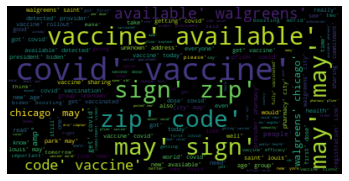

In [ ]:
import matplotlib.pyplot as plt
#filter the df to one candidate, and create a list of responses from them
text = df1[df1.overall=='Positive'].full_text.tolist() 
# join the list and lowercase all the words
text = ' '.join(str(i) for i in text)
#create the wordcloud object
wordcloud = WordCloud(stopwords=stopword,collocations=True).generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- visualizing negative words

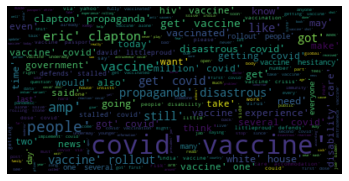

In [ ]:
#filter the df to one candidate, and create a list of responses from them
text = df1[df1.overall=='Negative'].full_text.tolist() 

# join the list and lowercase all the words
text = ' '.join(str(i) for i in text)

#create the wordcloud object
wordcloud = WordCloud(stopwords = stopword,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- visualizing neutral words

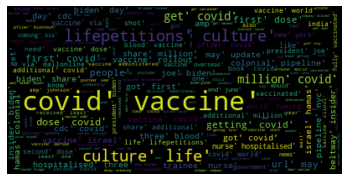

In [ ]:
#filter the df to one candidate, and create a list of responses from them
text = df1[df1.overall=='Neutral'].full_text.tolist() 
# join the list and lowercase all the words
text = ' '.join(str(i) for i in text)
#create the wordcloud object
wordcloud = WordCloud(stopwords = stopword,
                      collocations=True).generate(text)
#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

- overall words visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


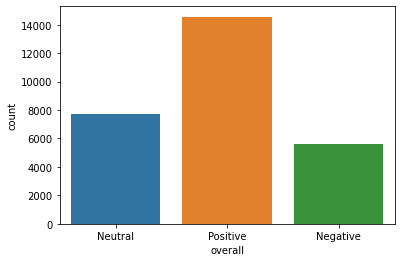

In [ ]:
import seaborn as sns
sns.countplot(df1['overall'])

In [ ]:
df1["full_text"]=df1["full_text"].apply(lambda x:' '.join([i+' ' for i in x]))
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,full_text,pos,senti_score,overall
1,listen tiktok move arm covid vaccine many,"[(listen, JJ), (tiktok, JJ), (move, NN), (arm,...",0.000,Neutral
2,feel good tuesday across south africa pl...,"[(feel, VB), (good, JJ), (tuesday, NN), (acros...",1.250,Positive
3,defer vaccine covid infected hey got rei...,"[(defer, NN), (vaccine, NN), (covid, NN), (inf...",0.125,Positive
4,pakistan receives million sinovac covid v...,"[(pakistan, JJ), (receives, NNS), (million, CD...",0.000,Neutral
5,covid news live vaccine year arrive toda...,"[(covid, JJ), (news, NN), (live, CD), (vaccine...",0.375,Positive


Features engineering 

- BOW

In [ ]:
# The following code creates a word-document matrix.
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(df1["full_text"])
bow= pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
bow.head(3)

,aadhaar,aadhar,aajtak,aakp,aamaadmiparty,aanp,aaos1,aap,aapne,aapnews,aaps,aapsonline,aargh,aarogya,aaron,aarp,aayushishah,aback,abad,abandon,abandoned,abandoning,abating,abbashafeez,abbassy,abbott,abby,abc,abc7,abcaustralia,abccollab,abcdarwin,abcmelbourne,abcnews,abctricities,abdul,abdulla,abe,abeg,abegreenwald,...,𝐍𝐚𝐦𝐞,𝐒𝐚𝐯𝐢𝐨𝐮𝐫,𝐠𝐨𝐭,𝐨𝐧𝐞,𝐨𝐧𝐥𝐲,𝐮𝐩𝐝𝐚𝐭𝐞,𝐯𝐚𝐜𝐜𝐢𝐧𝐞,𝗔𝘂𝘁𝗵𝗼𝗿𝘀,𝗔𝘃𝗮𝗶𝗹𝗮𝗯𝗹𝗲,𝗖𝗢𝗩𝗜𝗗,𝗗𝗮𝘆,𝗘𝘂𝗿𝗼𝗽𝗲,𝗡𝗢𝗪,𝗡𝗼𝘄,𝗢𝗳𝗳𝗶𝗰𝗲,𝗢𝘂𝗿,𝗣𝗼𝘀𝘁,𝗧𝗵𝗲,𝗧𝗶𝘁𝗹𝗲,𝗧𝗿𝘂𝘀𝘁𝗲𝗱,𝗩𝗮𝗰𝗰𝗶𝗻𝗲,𝗩𝗼𝗶𝗰𝗲𝘀,𝗮𝗻𝗱,𝗰𝗵𝗮𝗹𝗹𝗲𝗻𝗴𝗲𝘀,𝗳𝗼𝗿,𝗹𝗶𝗰𝗲𝗻𝘀𝘂𝗿𝗲,𝗺𝗼𝗻𝗶𝘁𝗼𝗿𝗶𝗻𝗴,𝘀𝗼𝗹𝘂𝘁𝗶𝗼𝗻𝘀,𝘃𝗮𝗰𝗰𝗶𝗻𝗲,𝘓𝘋𝘏,𝘛𝘩𝘪𝘴,𝘧𝘳𝘰𝘮,𝘪𝘯𝘧𝘰𝘳𝘮𝘢𝘵𝘪𝘰𝘯,𝘳𝘦𝘲𝘶𝘦𝘴𝘵,𝘴𝘩𝘢𝘳𝘦𝘥,𝘵𝘩𝘦,𝘸𝘪𝘵𝘩,𝘺𝘰𝘶,𝙁𝙍𝙀𝙀,𝙏𝙤𝙜𝙚𝙩𝙝𝙚𝙧
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
vect = CountVectorizer()
vect.fit(df1["full_text"])
vect.get_feature_names()
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(df1["full_text"])
print(simple_train_dtm)
### Creating a python object of the class CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             ngram_range=(1,3)) # number of n-grams

bow_data = bow_counts.fit_transform(df1["full_text"])

  (0, 811)	1
  (0, 3212)	1
  (0, 8212)	1
  (0, 8593)	1
  (0, 9241)	1
  (0, 14195)	1
  (0, 14957)	1
  (1, 149)	1
  (1, 276)	1
  (1, 906)	1
  (1, 3212)	1
  (1, 5151)	1
  (1, 5731)	1
  (1, 5857)	1
  (1, 5893)	1
  (1, 9998)	1
  (1, 10693)	1
  (1, 10717)	1
  (1, 13145)	1
  (1, 13529)	1
  (1, 14495)	1
  (1, 14895)	1
  (1, 14957)	1
  (2, 214)	1
  (2, 3212)	1
  :	:
  (27891, 3431)	1
  (27891, 3490)	1
  (27891, 5771)	2
  (27891, 7014)	1
  (27891, 8713)	1
  (27891, 9809)	1
  (27891, 10557)	1
  (27891, 14307)	1
  (27891, 14837)	1
  (27891, 14957)	3
  (27891, 15172)	1
  (27892, 370)	1
  (27892, 1032)	1
  (27892, 3183)	1
  (27892, 4616)	1
  (27892, 4830)	1
  (27892, 4833)	1
  (27892, 6331)	1
  (27892, 6840)	1
  (27892, 11863)	1
  (27892, 12420)	1
  (27892, 12805)	1
  (27892, 13350)	1
  (27892, 14743)	1
  (27892, 14957)	1


- splitting of data

In [ ]:
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features,
                                                                    df1["overall"],
                                                          # Target variable
                                                                    test_size = 0.3, # test size
                                                                    random_state = 0) # random

- logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
### Training the model 
lr_model_all = LogisticRegression() # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow) # Fitting a logistic regression model
## Predicting the output
test_pred_lr_all = lr_model_all.predict(X_test_bow)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tf-idf

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
noise_words = []
### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(df1["full_text"])

- splitting data

In [ ]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            df1["overall"],
                                                                            test_size = 0.3,
                                                                            random_state = 0)

- Logistic regression and evaluation using tf-idf

In [ ]:
### Setting up the model class
lr_model_tf_idf = LogisticRegression()
## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)
## Prediciting the results
test_pred_lr_all = lr_model_tf_idf.predict(X_test_tfidf)
## Calculate key performance metrics
# Print a classification report
print(classification_report(y_test_tfidf,test_pred_lr_all))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

    Negative       0.87      0.76      0.81      1678
     Neutral       0.85      0.84      0.85      2281
    Positive       0.89      0.94      0.91      4409

    accuracy                           0.88      8368
   macro avg       0.87      0.85      0.86      8368
weighted avg       0.87      0.88      0.87      8368



- evaluation using bow 

In [ ]:
from sklearn.metrics import classification_report
# Print a classification report
print(classification_report(y_test_bow,test_pred_lr_all))

              precision    recall  f1-score   support

    Negative       0.92      0.83      0.87      1678
     Neutral       0.87      0.94      0.90      2281
    Positive       0.95      0.94      0.95      4409

    accuracy                           0.92      8368
   macro avg       0.91      0.90      0.91      8368
weighted avg       0.92      0.92      0.92      8368



- Conclusion

BOW is best feature engineering as compared to tf-idf